<a href="https://colab.research.google.com/github/rahvlrawat/DL-2020-playbooks/blob/master/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/rahvlrawat/fastbook


Cloning into 'fastbook'...
remote: Enumerating objects: 1723, done.
remote: Total 1723 (delta 0), reused 0 (delta 0), pack-reused 1723
Receiving objects: 100% (1723/1723), 70.52 MiB | 37.95 MiB/s, done.
Resolving deltas: 100% (1015/1015), done.


In [ ]:
cd fastbook/

/content/fastbook


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 1.1MB 8.6MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 40kB 4.4MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 2.6MB 30.5MB/s 


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 358kB 4.0MB/s 
     |████████████████████████████████| 1.0MB 12.9MB/s 
     |████████████████████████████████| 10.5MB 18.6MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai2.vision.widgets import * 


In [ ]:
key='ca1262fcea03463d93ae0c8efea569d9'

In [ ]:
search_images_bing

<function fastbook.search_images_bing>

In [ ]:
results=search_images_bing(key,'languages')
ims=results.attrgot('content_url')
len(ims)

150

In [ ]:
ims


(#150) ['http://dubeat.com/wp-content/uploads/saying_hello_in_different_languages.jpg','http://elucabista.com/wp-content/uploads/2018/06/Languages-tags.jpg','https://s17026.pcdn.co/wp-content/uploads/sites/9/2017/05/AdobeStock_65123367.jpeg','https://s3.amazonaws.com/com.twilio.prod.twilio-docs/images/languages.width-808.png','https://www.travelsadanceaway.com/wp-content/uploads/2015/10/IMG_1689-0.png','https://blog.apaonline.org/wp-content/uploads/2016/09/hello-in-foreign-languages.png','http://astanatimes.com/wp-content/uploads/2016/04/635890855091031361-483586569_languages.jpg','https://images.alphacoders.com/716/716962.jpg','https://p.motionelements.com/stock-video/signs-symbols/me1117681-hello-different-languages-hd-a0314.jpg','http://www.abouteducation.us/wp-content/uploads/2018/05/Foreign-Language-Learning-For-Kids.jpg'...]

In [ ]:
dest='images/lang.jpg'
download_url(ims[0],dest)

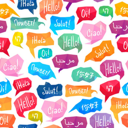

In [ ]:
im=Image.open(dest)
im.to_thumb(128,128)

In [ ]:
lan_types='Hindi','English','Mandarin'
path=Path('Lingo')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in lan_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} language')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
fns = get_image_files(path)
fns

(#448) [Path('Lingo/English/00000080.jpg'),Path('Lingo/English/00000007.jpg'),Path('Lingo/English/00000020.jpg'),Path('Lingo/English/00000055.jpg'),Path('Lingo/English/00000115.png'),Path('Lingo/English/00000037.jpg'),Path('Lingo/English/00000114.jpg'),Path('Lingo/English/00000064.jpg'),Path('Lingo/English/00000078.jpg'),Path('Lingo/English/00000102.png')...]

In [ ]:
failed = verify_images(fns)
failed

(#8) [Path('Lingo/English/00000025.jpg'),Path('Lingo/Hindi/00000078.jpg'),Path('Lingo/Hindi/00000117.png'),Path('Lingo/Hindi/00000076.jpg'),Path('Lingo/Hindi/00000069.gif'),Path('Lingo/Hindi/00000148.jpg'),Path('Lingo/Mandarin/00000103.jpg'),Path('Lingo/Mandarin/00000004.jpg')]

In [ ]:
failed.map(Path.unlink)

FileNotFoundError: ignored

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
lan = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [ ]:
dls = lan.dataloaders(Path('Lingo'))

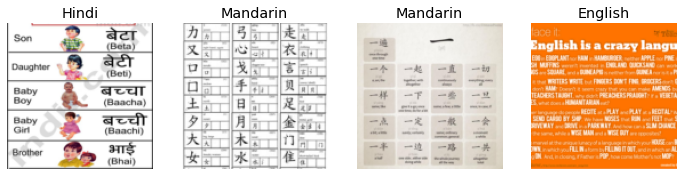

In [ ]:
dls.valid.show_batch(max_n=4,nrows=1)

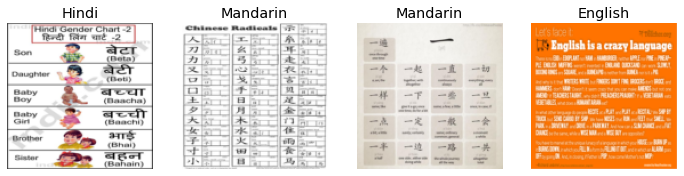

In [ ]:
lan=lan.new(item_tfms=Resize(128,ResizeMethod.Squish))
dls=lan.dataloaders(path)
dls.valid.show_batch(max_n=4,nrows=1)

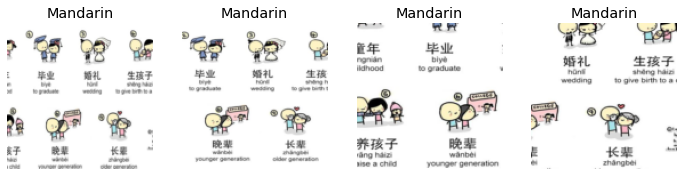

In [ ]:
lan= lan.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = lan.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

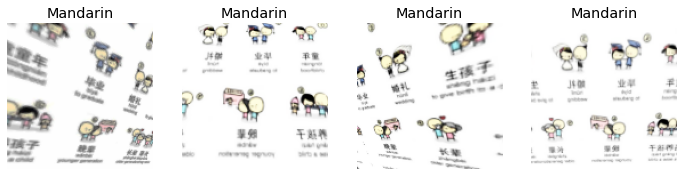

In [ ]:
lan=lan.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls=lan.dataloaders(path)
dls.train.show_batch(max_n=4,nrows=1,unique=True)

In [ ]:
learn=cnn_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.905884,1.399105,0.465909,00:33


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.590902,0.982627,0.409091,00:41
1,1.396896,0.928218,0.386364,00:41
2,1.276221,0.883533,0.329545,00:40
3,1.229581,0.866340,0.318182,00:40


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

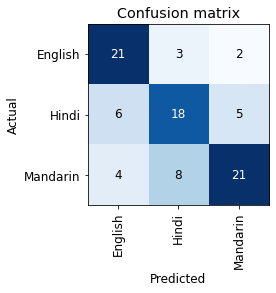

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

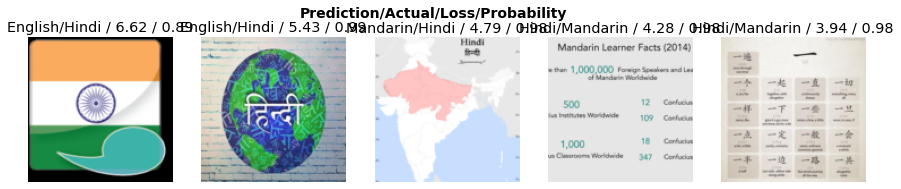

In [ ]:
interp.plot_top_losses(5,nrows=1)

In [ ]:
cleaner=ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: ignored

In [ ]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]),path/cat)

In [ ]:
learn.export()

In [ ]:
path=Path()

In [ ]:
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf=load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/download.png')

('English', tensor(0), tensor([0.7712, 0.1133, 0.1155]))

In [ ]:
learn_inf.dls.vocab

(#3) ['English','Hindi','Mandarin']

# WEB APPLICATION

In [ ]:
btn_upload=widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

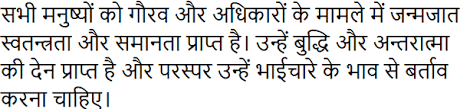

In [ ]:

img=PILImage.create(btn_upload.data[-1])
img

In [ ]:
out_pl=widgets.Output()
out_pl.clear_output()

out_pl


In [ ]:
with out_pl:display(img.to_thumb(128,128))

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = 'Please Choose an Image'
lbl_pred

Label(value='Please Choose an Image')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    out_pl
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    lbl

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [1]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix

Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
